In [62]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [63]:
# Function to load and preprocess images from the dataset
def load_images_from_folder(folder):
    images = []
    labels = []
    for label, digit in enumerate(os.listdir(folder)):
        digit_folder = os.path.join(folder, digit)
        for filename in os.listdir(digit_folder):
            img_path = os.path.join(digit_folder, filename)
            image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if image is not None:
                image = cv2.resize(image, (28, 28))
                images.append(image)
                labels.append(label)
    return np.array(images), np.array(labels)

# Load images and labels from the dataset folder
X, y = load_images_from_folder('/content/drive/MyDrive/digits')

In [64]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
#Normalize pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [66]:
# Reshape images for CNN input (add a channel dimension)
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

In [67]:
# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [68]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [69]:
# Train the model
history=model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/5
539/539 [==============================] - 18s 32ms/step - loss: 1.2928 - accuracy: 0.5660 - val_loss: 0.5387 - val_accuracy: 0.8416
Epoch 2/5
539/539 [==============================] - 20s 37ms/step - loss: 0.4223 - accuracy: 0.8729 - val_loss: 0.3404 - val_accuracy: 0.8975
Epoch 3/5
539/539 [==============================] - 17s 31ms/step - loss: 0.2870 - accuracy: 0.9111 - val_loss: 0.2611 - val_accuracy: 0.9237
Epoch 4/5
539/539 [==============================] - 17s 31ms/step - loss: 0.2152 - accuracy: 0.9356 - val_loss: 0.2464 - val_accuracy: 0.9244
Epoch 5/5
539/539 [==============================] - 17s 31ms/step - loss: 0.1716 - accuracy: 0.9475 - val_loss: 0.2013 - val_accuracy: 0.9408


In [70]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

135/135 [==============================] - 1s 8ms/step - loss: 0.2013 - accuracy: 0.9408
Test Accuracy: 0.9408490061759949


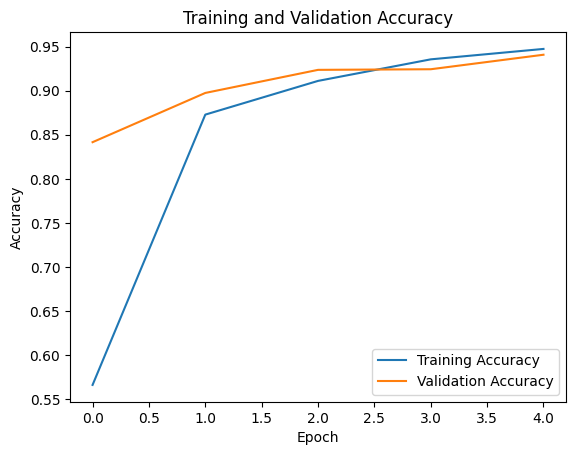

In [71]:
# Plot training and validation accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

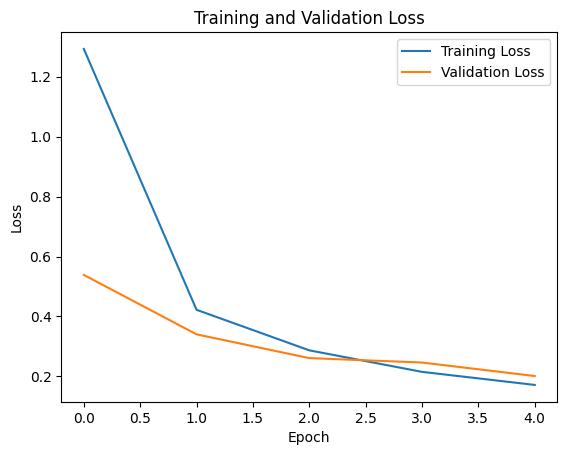

In [72]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Save the trained model
model.save('digits_recognition_cnn.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Converted Image:


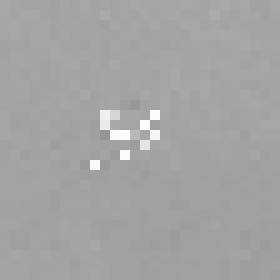

1/1 [==============================] - 0s 76ms/step
Predicted Digit: 8


In [33]:
import cv2
import numpy as np
from keras.models import load_model
from google.colab.patches import cv2_imshow

# Load the trained model
model = load_model('/content/digits_recognition_cnn.h5')

def preprocess_and_predict_digit(image_path):
    # Preprocess the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print("Error: Unable to load image at", image_path)
        return

    # Resize the image to 28x28 pixels
    resized_image = cv2.resize(image, (28, 28))

    # Invert the colors (black to white and white to black)
    inverted_image = cv2.bitwise_not(resized_image)

    # Normalize pixel values to range [0, 1]
    normalized_image = inverted_image.astype('float32') / 255.0

    # Add a channel dimension to match MNIST format
    mnist_format_image = normalized_image.reshape((1, 28, 28, 1))

    # Display the converted image (scaled up for better visibility)
    scaled_image = cv2.resize(inverted_image, None, fx=10, fy=10, interpolation=cv2.INTER_NEAREST)
    print("Converted Image:")
    cv2_imshow(scaled_image)

    # Predict the digit
    prediction = model.predict(mnist_format_image)
    predicted_digit = np.argmax(prediction)
    print("Predicted Digit:", predicted_digit)

# Example usage:
image_path = '/content/drive/MyDrive/test images/test(9).jpeg'  # Replace with the actual path to your digit image
preprocess_and_predict_digit(image_path)


In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import cv2
import os

# Load dataset
def load_dataset(dataset_path):
    X = []
    y = []
    for digit in os.listdir(dataset_path):
        digit_path = os.path.join(dataset_path, digit)
        for image_file in os.listdir(digit_path):
            image_path = os.path.join(digit_path, image_file)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            if image is not None:
                X.append(image.flatten())
                y.append(int(digit))
    return np.array(X), np.array(y)

# Load your handwritten image dataset (replace 'dataset_path' with your dataset path)
dataset_path = '/content/drive/MyDrive/digits'
X, y = load_dataset(dataset_path)

In [51]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [52]:
# Support Vector Machine (SVM) Classifier
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_predictions = svm_clf.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 0.8322894919972165


In [53]:
# K-Nearest Neighbors (KNN) Classifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
knn_predictions = knn_clf.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("KNN Accuracy:", knn_accuracy)

KNN Accuracy: 0.6866156344235677


In [54]:
# Random Forest Classifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
rf_predictions = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.7680352586406867


In [55]:
# Naive Bayes Classifier
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
nb_predictions = nb_clf.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)
print("Naive Bayes Accuracy:", nb_accuracy)

Naive Bayes Accuracy: 0.3159359777313848


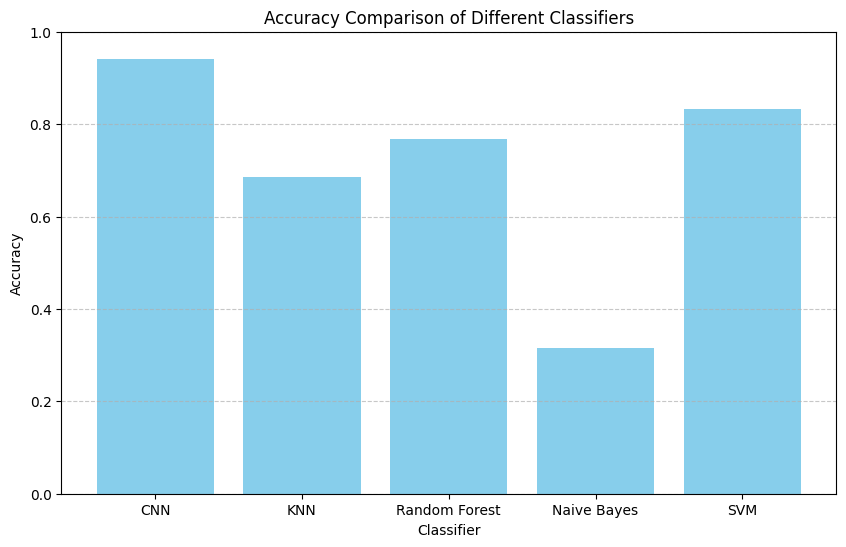

In [73]:
import matplotlib.pyplot as plt

# Accuracy values for each classifier
classifiers = ['CNN', 'KNN', 'Random Forest', 'Naive Bayes', 'SVM']
accuracies = [accuracy, knn_accuracy, rf_accuracy, nb_accuracy, svm_accuracy]

# Plotting the comparison graph
plt.figure(figsize=(10, 6))
plt.bar(classifiers, accuracies, color='skyblue')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Classifiers')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
